In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
uid_train = pd.read_csv('JDATA_train/uid_train.txt',sep='\t',header=None,names=('uid','label'))
voice_train = pd.read_csv('JDATA_train/voice_train.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out'))
sms_train = pd.read_csv('JDATA_train/sms_train.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','in_out'),dtype={'start_time':str})
wa_train = pd.read_csv('JDATA_train/wa_train.txt',sep='\t',header=None,names=('uid','wa_name','visit_cnt','visit_dura','up_flow','down_flow','wa_type','date'),dtype={'date':str})

d:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
voice_test = pd.read_csv('JDATA_Test-B/voice_test_b.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','end_time','call_type','in_out'))
sms_test = pd.read_csv('JDATA_Test-B/sms_test_b.txt',sep='\t',header=None,names=('uid','opp_num','opp_head','opp_len','start_time','in_out'),dtype={'start_time':str})
wa_test = pd.read_csv('JDATA_Test-B/wa_test_b.txt',sep='\t',header=None,names=('uid','wa_name','visit_cnt','visit_dura','up_flow','down_flow','wa_type','date'),dtype={'date':str})

In [4]:
uid_test = pd.DataFrame({'uid':pd.unique(wa_test['uid'])})
uid_test.to_csv('data/uid_test_a.txt',index=None)

In [5]:
voice = pd.concat([voice_train,voice_test],axis=0)
sms = pd.concat([sms_train,sms_test],axis=0)
wa = pd.concat([wa_train,wa_test],axis=0)

print(voice.head(3))
print(type(voice))
print(sms.head(3))
print(type(sms))
print(wa.head(3))
print(type(wa))

     uid                           opp_num opp_head  opp_len  start_time  \
0  u0113  38D54642A237A11BB18455FC1E505292      132       11    26115956   
1  u0113  38D54642A237A11BB18455FC1E505292      132       11    26115623   
2  u0113  38D54642A237A11BB18455FC1E505292      132       11    26174233   

   end_time  call_type  in_out  
0  26120033          1       1  
1  26115707          1       1  
2  26174321          1       1  
<class 'pandas.core.frame.DataFrame'>
     uid                           opp_num  opp_head  opp_len start_time  \
0  u4003  B378E065731B897E7295926B27CBA0D5       186       11   20174042   
1  u4003  B378E065731B897E7295926B27CBA0D5       186       11   20174130   
2  u4003  1B15607F3E6D167B44D46046D5993D87       189       11   20015746   

   in_out  
0       1  
1       1  
2       0  
<class 'pandas.core.frame.DataFrame'>
     uid wa_name  visit_cnt  visit_dura  up_flow  down_flow  wa_type date
0  u0001   155导航        5.0       207.0    313.0      457.0 

d:\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
d:\python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':
d:\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=891, step=1)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


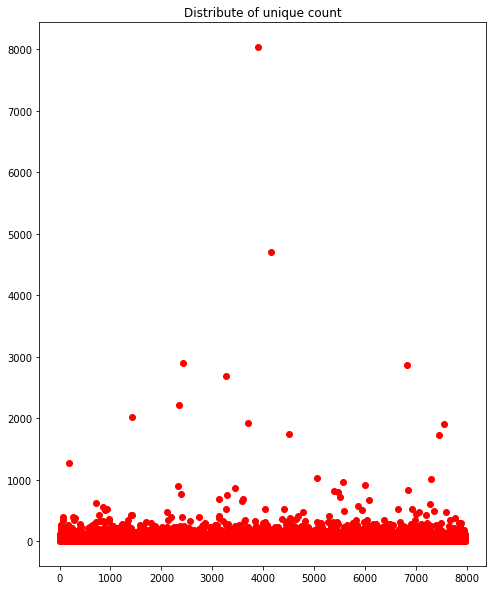

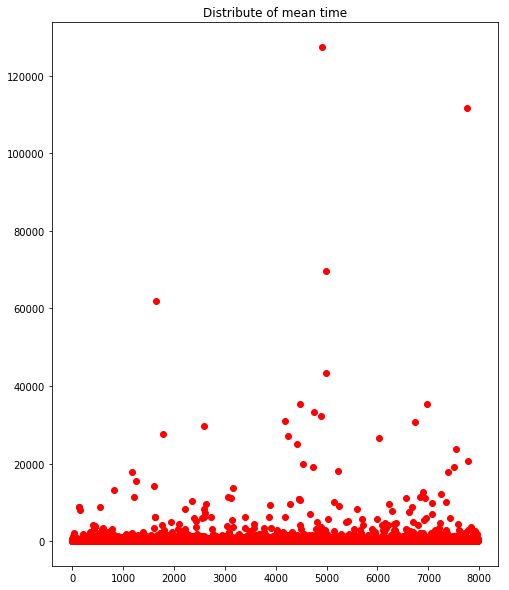

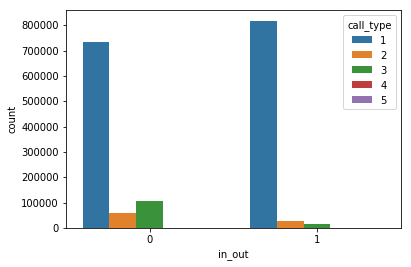

In [29]:
import seaborn as sns

voice_opp_num = voice.groupby(['uid'])['opp_num'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('voice_opp_num_').reset_index()
#print(voice_opp_num.head(3))
plt.figure(figsize=(8, 10))
plt.scatter(range(voice_opp_num.shape[0]), voice_opp_num['voice_opp_num_unique_count'].values, color = 'red')
plt.title('Distribute of unique count')

voice_opp_head=voice.groupby(['uid'])['opp_head'].agg({'unique_count': lambda x: len(pd.unique(x))}).add_prefix('voice_opp_head_').reset_index()

voice_opp_len=voice.groupby(['uid','opp_len'])['uid'].count().unstack().add_prefix('voice_opp_len_').reset_index().fillna(0)

voice['time'] = voice['end_time'] - voice['start_time']
voice_time = voice.groupby(['uid'])['time'].agg({'mean_time':lambda x: x.mean()}).add_prefix('voice_').reset_index().fillna(0)
#print(voice_time.head(3))
plt.figure(figsize=(8, 10))
plt.scatter(range(voice_time.shape[0]), voice_time['voice_mean_time'].values, color = 'red')
plt.title('Distribute of mean time')

voice_call_type = voice.groupby(['uid','call_type'])['uid'].count().unstack().add_prefix('voice_call_type_').reset_index().fillna(0)
#print(voice_call_type.head(3))
plt.figure()
sns.countplot(x = 'in_out',hue='call_type', data = voice)

titanic = sns.load_dataset("titanic")
print(type(titanic))
print(titanic.index)
print(titanic.columns)
#sns.countplot(x="alone", hue="who", data=titanic)

voice_in_out = voice.groupby(['uid','in_out'])['uid'].count().unstack().add_prefix('voice_in_out_').reset_index().fillna(0)

d:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
d:\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
d:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


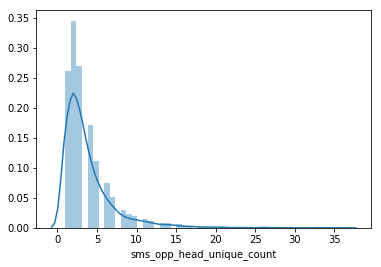

In [30]:

sms_opp_num = sms.groupby(['uid'])['opp_num'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('sms_opp_num_').reset_index()

sms_opp_head=sms.groupby(['uid'])['opp_head'].agg({'unique_count': lambda x: len(pd.unique(x))}).add_prefix('sms_opp_head_').reset_index()
sns.distplot(sms_opp_head['sms_opp_head_unique_count'])
sms_opp_len=sms.groupby(['uid','opp_len'])['uid'].count().unstack().add_prefix('sms_opp_len_').reset_index().fillna(0)
#print(sms_opp_len.head(3))
sms_in_out = sms.groupby(['uid','in_out'])['uid'].count().unstack().add_prefix('sms_in_out_').reset_index().fillna(0)

d:\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
d:\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


     uid  wa_visit_cnt_std  wa_visit_cnt_max  wa_visit_cnt_min  \
0  u0001        290.475238            3747.0               1.0   
1  u0002          6.412734              24.0               1.0   
2  u0003         62.825353            1227.0               1.0   

   wa_visit_cnt_median  wa_visit_cnt_mean  wa_visit_cnt_sum  
0                  5.0          84.583550           97694.0  
1                  4.0           6.137931             178.0  
2                  4.0          20.388175           23793.0  


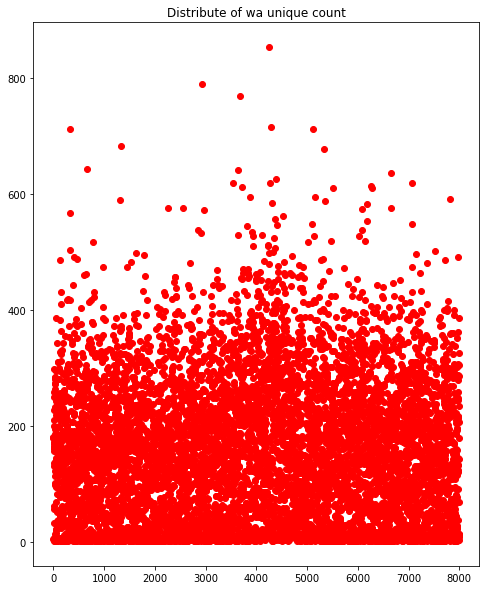

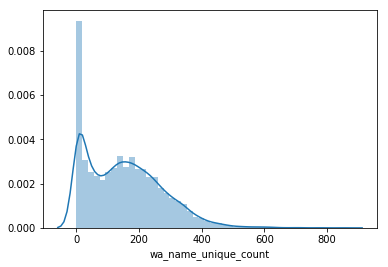

In [34]:
wa_name = wa.groupby(['uid'])['wa_name'].agg({'unique_count': lambda x: len(pd.unique(x)),'count':'count'}).add_prefix('wa_name_').reset_index()
plt.figure(figsize=(8, 10))
plt.scatter(range(wa_name.shape[0]), wa_name['wa_name_unique_count'].values, color = 'red')
plt.title('Distribute of wa unique count')
plt.figure()
sns.distplot(wa_name['wa_name_unique_count'])


visit_cnt = wa.groupby(['uid'])['visit_cnt'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_visit_cnt_').reset_index()
print(visit_cnt.head(3))

visit_dura = wa.groupby(['uid'])['visit_dura'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_visit_dura_').reset_index()


up_flow = wa.groupby(['uid'])['up_flow'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_up_flow_').reset_index()

down_flow = wa.groupby(['uid'])['down_flow'].agg(['std','max','min','median','mean','sum']).add_prefix('wa_down_flow_').reset_index()

In [18]:
feature = [voice_opp_num,voice_opp_head,voice_opp_len,voice_call_type,voice_in_out,voice_time,sms_opp_num,sms_opp_head,sms_opp_len,sms_in_out,wa_name,visit_cnt,visit_dura,up_flow,
           down_flow]

In [19]:
train_feature = uid_train
for feat in feature:
    train_feature=pd.merge(train_feature,feat,how='left',on='uid')

In [20]:
test_feature = uid_test
for feat in feature:
    test_feature=pd.merge(test_feature,feat,how='left',on='uid')
    
train_feature.to_csv('data/train_featureV1.csv',index=None)
test_feature.to_csv('data/test_featureV1.csv',index=None)